In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Fri Apr 30 10:12:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content/drive/MyDrive/EBMRS

/content/drive/MyDrive/EBMRS


# **Import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from keras.preprocessing import image

(48, 48, 3)


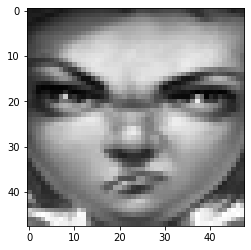

In [ ]:
img = image.load_img('tt_data/train/angry/Training_37417413.jpg',target_size=(48,48))
img = np.array(img)
plt.imshow(img)
print(img.shape)

# **DATA AUGMENTATION**

The image augmentation technique is a great way to expand the size of our dataset. We can come up with new transformed images from our original dataset.
Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques we apply like shifting, rotating, flipping, etc.

Applying these small amounts of variations on the original image does not change its target class but only provides a new perspective of capturing the object in real life. And so, we use it is quite often for building deep learning models. 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 32           #Batch_Size

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=5,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,        #zoom in the range [1-zoom_range,1+zoom_range]
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = 'tt_data/train',
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   color_mode = 'grayscale',
                                                   shuffle = True,
                                                   batch_size = batch_size)

Found 25102 images belonging to 5 classes.


In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = 'tt_data/train',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  color_mode = 'grayscale',
                                                  batch_size = batch_size, 
                                                  shuffle = True)

Found 5020 images belonging to 5 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = 'tt_data/test',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  color_mode = 'grayscale',
                                                  batch_size = batch_size, 
                                                  shuffle = True)

Found 6236 images belonging to 5 classes.


In [ ]:
train_img = train_dataset.next()[0]
train_lables = train_dataset.next()[1]
valid_img = valid_dataset.next()[0]
valid_lables = valid_dataset.next()[1]

print(f'shape of the train dataset: {train_img.shape}')
print(f'shape of the train labels: {train_lables.shape}')
print(f'shape of the validation dataset: {train_img.shape}')
print(f'shape of the validation labels: {train_lables.shape}')

shape of the train dataset: (32, 48, 48, 1)
shape of the train labels: (32, 5)
shape of the validation dataset: (32, 48, 48, 1)
shape of the validation labels: (32, 5)


# **Convolution Neural Network(CNN/ConvNet)**

A Convolutional Neural Network is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a CNN is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.


The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
model = Sequential([
                    
                    # Block-1
                    Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', activation='elu', input_shape=(48,48,1)),
                    BatchNormalization(),
                    Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', activation='elu', input_shape=(48,48,1)),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.2),

                    # Block-2 
                    Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'),
                    BatchNormalization(),
                    Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.2),

                    # Block-3
                    Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'),
                    BatchNormalization(),
                    Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.2),

                    # Block-4
                    Conv2D(256, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'),
                    BatchNormalization(),
                    Conv2D(256, (3,3), padding='same', kernel_initializer='he_normal', activation='elu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.2),

                    # Block-5
                    Flatten(),
                    Dense(64, kernel_initializer='he_normal', activation='elu'),
                    BatchNormalization(),
                    Dropout(0.5),
                    
                    # Block-6
                    Dense(64, kernel_initializer='he_normal', activation='elu'),
                    BatchNormalization(),
                    Dropout(0.5),
                    
                    # Block-7
                    Dense(5, kernel_initializer='he_normal', activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('model_emotion_r.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])

train_samples = 25102
validation_samples = 5020
epochs=25

history=model.fit(
                train_dataset,
                steps_per_epoch=train_samples//32,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=valid_dataset,
                validation_steps=validation_samples//32)


Epoch 1/25
784/784 [==============================] - 8276s 11s/step - loss: 2.1546 - accuracy: 0.2261 - val_loss: 1.5595 - val_accuracy: 0.3001

Epoch 00001: val_loss improved from inf to 1.55950, saving model to model_emotion.h5
Epoch 2/25
784/784 [==============================] - 53s 67ms/step - loss: 1.6131 - accuracy: 0.2672 - val_loss: 1.6270 - val_accuracy: 0.3023

Epoch 00002: val_loss did not improve from 1.55950
Epoch 3/25
784/784 [==============================] - 51s 65ms/step - loss: 1.5365 - accuracy: 0.3248 - val_loss: 1.3848 - val_accuracy: 0.4145

Epoch 00003: val_loss improved from 1.55950 to 1.38477, saving model to model_emotion.h5
Epoch 4/25
784/784 [==============================] - 50s 64ms/step - loss: 1.3931 - accuracy: 0.4052 - val_loss: 1.2398 - val_accuracy: 0.4892

Epoch 00004: val_loss improved from 1.38477 to 1.23980, saving model to model_emotion.h5
Epoch 5/25
784/784 [==============================] - 50s 63ms/step - loss: 1.2959 - accuracy: 0.4562 - v

In [ ]:
result = model.evaluate(test_dataset, batch_size = batch_size)

195/195 [==============================] - 1981s 10s/step - loss: 0.9052 - accuracy: 0.6488


# **Load Model and Train for more epoches**

In [ ]:
from tensorflow import keras
reconstruct_model = keras.models.load_model('/content/drive/MyDrive/EBMRS/model_emotion.h5')

In [ ]:
train_samples = 25102
validation_samples = 5020
epochs=25

history_r=reconstruct_model.fit(
                train_dataset,
                steps_per_epoch=train_samples//32,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=valid_dataset,
                validation_steps=validation_samples//32)

Epoch 1/25
784/784 [==============================] - 51s 64ms/step - loss: 0.9389 - accuracy: 0.6440 - val_loss: 0.8173 - val_accuracy: 0.6865

Epoch 00001: val_loss improved from inf to 0.81725, saving model to model_emotion_r.h5
Epoch 2/25
784/784 [==============================] - 50s 64ms/step - loss: 0.9377 - accuracy: 0.6433 - val_loss: 0.8077 - val_accuracy: 0.6833

Epoch 00002: val_loss improved from 0.81725 to 0.80765, saving model to model_emotion_r.h5
Epoch 3/25
784/784 [==============================] - 50s 64ms/step - loss: 0.9301 - accuracy: 0.6467 - val_loss: 0.7948 - val_accuracy: 0.6939

Epoch 00003: val_loss improved from 0.80765 to 0.79485, saving model to model_emotion_r.h5
Epoch 4/25
784/784 [==============================] - 50s 64ms/step - loss: 0.9248 - accuracy: 0.6505 - val_loss: 0.7872 - val_accuracy: 0.7019

Epoch 00004: val_loss improved from 0.79485 to 0.78716, saving model to model_emotion_r.h5
Epoch 5/25
784/784 [==============================] - 50s 64

In [ ]:
result = reconstruct_model.evaluate(test_dataset, batch_size = batch_size)

195/195 [==============================] - 8s 39ms/step - loss: 0.8701 - accuracy: 0.6634


# **Loss and Accuracy plot**

## **Model trained for 25 epoches**

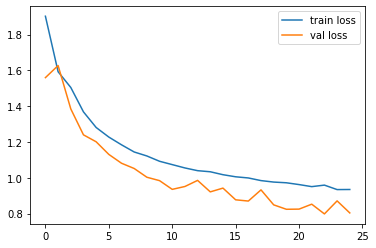

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('plots/Validation_Loss')

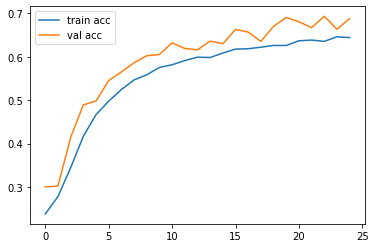

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('plots/validation_accuracy')

## **Model Trained for (epoches>25)**

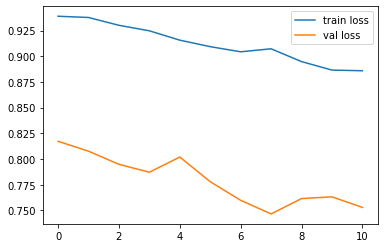

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(history_r.history['loss'], label='train loss')
plt.plot(history_r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('plots/Validation_Loss_r')

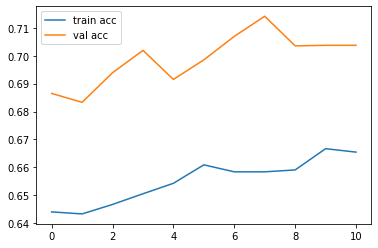

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(history_r.history['accuracy'], label='train acc')
plt.plot(history_r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('plots/validation_accuracy_r')